# Prosper Loan Data Exploration
## by Angel Newportright


## Introduction

[**Prosper**](https://www.prosper.com/) is a **peer-to-peer lending platform** that provides personal loans to borrowers with fair or good credit. 

To qualify applicants, the company uses a proprietary rating system that considers data points like credit history and debt-to-income ratio.

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Included is the data dictionary that explains the variables in the data set. 

We are not expected to explore all of the variables in the dataset!. **Hence, we will focus our exploration on about 10 (minimum) to 20 (maximum) variables**. 

#### Project Steps Overview
The anlysis of this project will follow these steps:

* Step 1: Gathering data
* Step 2: Assessing data
* Step 3: Cleaning data
* Step 4: Storing data
* Step 5: Analyzing, and visualizing data
* Step 6: Reporting

## Preliminary Wrangling

### Step 1: GATHERING DATA

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Importing the Prosper loan data
loan_original = pd.read_csv('loan_data.csv')

# Importing the data dictionary
data_dict = pd.read_csv('Prosper_Loan_Data_Dictionary.csv')

In [3]:
# Identifying Chosen variables for analysis
colums = ['LoanNumber', 'ListingCreationDate','ListingCategory (numeric)', 
          'LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'IncomeVerifiable',
          'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate','Term',
          'MonthlyLoanPayment','InvestmentFromFriendsCount', 'Recommendations', 'Investors', 'ClosedDate']

# Identifying Chosen variables for analysis for our data dictionary
columd = ['LoanNumber', 'ListingCreationDate','ListingCategory', 
          'LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
          'CreditScoreRangeLower', 'CreditScoreRangeUpper','IncomeRange', 'IncomeVerifiable',
          'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate','Term',
          'MonthlyLoanPayment','InvestmentFromFriendsCount', 'Recommendations', 'Investors', 'ClosedDate']
# There is slight difference in the two columns: while listing category in columns is followed by numeric, 
# the one used for our dictionary isn't followed by (numeric)

In [4]:
# Updating data dictionary
new_dict = data_dict[data_dict['Variable'].isin(columd)]
new_dict = new_dict.reset_index(drop=True)

In [5]:
# Creating dataframe with our chosen attributes
loan_data = loan_original[colums]

# Re-odering the loan data to conform with the way attributtes are listed
loan_data = loan_data.reindex(columns = colums)

### What is the structure of your dataset?

> Your answer here!

This data is structured in rows and columns. However, we have lots of missing data. We treat these missing data during our wrangling process. 

Some of these missing data are located in columns that are outside the focus of our analysis while some are within the rows of our focus. We will drop unecessary columns, merge when necessary and polish our datasaet to give us the closest to complete data we can have.

The oroginal dataset, as higlighted before has over 110k observations and 81 Atributes. After the wrangling process we will have relatively smaller observations and attributes

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

Instead of using all 81 Attributes of thr data, we will focus in the attributes listed below to derive meaningfull insight from our data. **Your quaestion might be,how did we select our attributes of focus?**

**For chosing what columns to use:** For example some colums are only valid for observations `dated after july 2009`, while some `dated prior to july 2009`. This affects the standardization of our dataset. Hence, we select columns that are not date sensitive

1. **ListingCreationDate:**	The date the listing was created.	
2. **Term:** The length of the loan expressed in months.
3. **LoanStatus:**	The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
4. **ClosedDate:**	Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.
5. **BorrowerAPR:**	The Borrower's Annual Percentage Rate (APR) for the loan.
6. **ListingCategory:**	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
7. **EmploymentStatus:**	The employment status of the borrower at the time they posted the listing.
8. **EmploymentStatusDuration:**	The length in months of the employment status at the time the listing was created.
9. **IsBorrowerHomeowner:**	A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
10. **CreditScoreRangeLower:**	The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
11. **CreditScoreRangeUpper:**	The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
12. **IncomeRange:**	The income range of the borrower at the time the listing was created.
13. **IncomeVerifiable:**	The borrower indicated they have the required documentation to support their income.
14. **StatedMonthlyIncome:**	The monthly income the borrower stated at the time the listing was created.
15. **LoanNumber:**	Unique numeric value associated with the loan.
16. **LoanOriginalAmount:**	The origination amount of the loan.
17. **LoanOriginationDate:**	The date the loan was originated.
18. **MonthlyLoanPayment:**	The scheduled monthly loan payment.
19. **InvestmentFromFriendsCount:**	Number of friends that made an investment in the loan.
20. **Recommendations:**	Number of recommendations the borrower had at the time the listing was created.
21. **Investors:**	The number of investors that funded the loan.

We will use all attributes,excluding **`ClosedDate`** as relatively large number of observations do not have closed date. This is bacause Closed date is applicable for only Cancelled, Completed, Chargedoff and Defaulted loan statuses


### Step 2: ASSESSING DATA

We are likely to encounter two types of issues when assessing data.
* Data quality issues: Data that has quality issues have issues with content like missing, duplicate, or incorrect data. This is called dirty data.
* Tidiness Issues: Data that has specific structural issues that slow you down when cleaning and analyzing, visualizing, or modeling your data later.

So we are chargred with two responsibilities here. To remove the dirty data and ensure our data is properly scructured for our analysis

In [6]:
# Creating a copy of the loan data
loan_datar = loan_data.copy()
loan_datar.head(1)

,LoanNumber,ListingCreationDate,ListingCategory (numeric),LoanStatus,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,...,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Term,MonthlyLoanPayment,InvestmentFromFriendsCount,Recommendations,Investors,ClosedDate
0,19141,2007-08-26 19:09:29.263000000,0,Completed,0.16516,Self-employed,2.0,True,640.0,659.0,...,True,3083.333333,9425,2007-09-12 00:00:00,36,330.43,0,0,258,2009-08-14 00:00:00


In [7]:
# Getting information of the data
loan_datar.info()

# describe()
# unique()
# nunique()
# value_counts()
# isnull().value_counts()
# etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   LoanNumber                  113937 non-null  int64  
 1   ListingCreationDate         113937 non-null  object 
 2   ListingCategory (numeric)   113937 non-null  int64  
 3   LoanStatus                  113937 non-null  object 
 4   BorrowerAPR                 113912 non-null  float64
 5   EmploymentStatus            111682 non-null  object 
 6   EmploymentStatusDuration    106312 non-null  float64
 7   IsBorrowerHomeowner         113937 non-null  bool   
 8   CreditScoreRangeLower       113346 non-null  float64
 9   CreditScoreRangeUpper       113346 non-null  float64
 10  IncomeRange                 113937 non-null  object 
 11  IncomeVerifiable            113937 non-null  bool   
 12  StatedMonthlyIncome         113937 non-null  float64
 13  LoanOriginalAm

In [8]:
# Counting Duplicate using LoanNumber, since it represents Unique numeric value associated with a loan.
loan_datar['LoanNumber'].duplicated().sum()

# loan_datar.drop_duplicates(subset='LoanNumber', keep='first', inplace=True)
# loan_datar['LoanNumber'].duplicated().sum()
# loan_datar['EmploymentStatus'].value_counts()

871

In [9]:
# assessing null values in the dataset
loan_datar.isnull().sum()

LoanNumber                        0
ListingCreationDate               0
ListingCategory (numeric)         0
LoanStatus                        0
BorrowerAPR                      25
EmploymentStatus               2255
EmploymentStatusDuration       7625
IsBorrowerHomeowner               0
CreditScoreRangeLower           591
CreditScoreRangeUpper           591
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanOriginalAmount                0
LoanOriginationDate               0
Term                              0
MonthlyLoanPayment                0
InvestmentFromFriendsCount        0
Recommendations                   0
Investors                         0
ClosedDate                    58848
dtype: int64

#### Quality Issues
1. There are duplicated `LoanNumber`. Remove these duplicates, keeping the first entries
2. `ListingCreationDate` is an object data type and have the `minutes and seconds` with few `Zeros` that are irrelevant. **1** convert this to DateTime, **2** Remove the minutes and Zeros.
3. `LoanOriginationDate` is an object data type and have few `Zeros` that are irrelevant. **1** convert this to DateTime, **2** Remove the minutes and Zeros.
4. `BorowerAPR` is in 5 decimal place. Round to 2 decimal place `round(Float, 2)`
5. There are observations with missing values. Drop observations with missing Values
6. `EmploymentStatusDuration` is a float. Convert to Integer
7. `StatedMonthlyIncome`  is in 7 decimal place. Convert to Integer.  Cents are irrelevant when considering monthly income.
8. There are boolean datatype in `IsBorrowerHomeowner` and `IncomeVerifiable` columns. Convert to String


#### Tidyness Issues
1. Relatively large number of the observations do not have closed date. Drop the `ClosedDate` column
2. `CreditScoreRangeLower` and `CreditScoreRangeUpper` are two seperate columns. They should be merged to form a new columns, to get the credit score range for each observation
3. The listing category is in numeric format. **1** Replace the numbers with the categories they represent, **2** Convert to categorical data type.

### STEP 3: CLEAINING DATA
In this section, we will clean all the issues we documented while assessing.

### Quality Issues

**Qulaity #1: There are duplicated `LoanNumber`**

**Define:** Remove these duplicates, keeping the first entries

**Code**

In [10]:
loan_datar.drop_duplicates(subset='LoanNumber', keep='first', inplace=True)

**Test**

In [11]:
loan_datar['LoanNumber'].duplicated().sum()

0

**Qulaity #2 and #3: `ListingCreationDate` and `LoanOriginationDate` are object data type and have the `minutes and seconds` with few `Zeros` that are irrelevant**

**Define:** Create a funtion to Remove the minutes and Zeros, then convert to DateTime.

**Code**

In [12]:
# Defining our function
def remover(col1, val1, col2, val2):
    '''
    col1, col2: Column Names
    val1, val2: Stop-Integer until which the slicing takes place.
    The remover function does two things:
    1. It slices the values of the two columns(col1, col2) specified, by the Stop-Integers(val1, val2) specified respectively.
    2. It convert the column data type to date time format
    '''
    import datetime as dt
    for column in loan_datar[[col1, col2]]:
        if column == col1:
            loan_datar[column] = loan_datar[column].str[:val1]
            loan_datar[column] = loan_datar[column].astype('datetime64[D]')
        elif column == col2:
            loan_datar[column] = loan_datar[column].str[:val2]
            loan_datar[column] = loan_datar[column].astype('datetime64[D]')
        else:
            column = column

In [13]:
# Calling the function created
remover('ListingCreationDate',  -19, 'LoanOriginationDate', -9)

**Test**

In [14]:
print(loan_datar[['ListingCreationDate','LoanOriginationDate']].dtypes)
loan_datar[['ListingCreationDate','LoanOriginationDate']].head(2)

ListingCreationDate    datetime64[ns]
LoanOriginationDate    datetime64[ns]
dtype: object


,ListingCreationDate,LoanOriginationDate
0,2007-08-26,2007-09-12
1,2014-02-27,2014-03-03


**Qulaity #4:** `BorrowerAPR` is in 5 decimal place.

**Define:** Round to 2 decimal place

**Code**

In [15]:
loan_datar['BorrowerAPR'] = round(loan_datar['BorrowerAPR'], 2)

**Test**

In [16]:
loan_datar['BorrowerAPR'].head(2)

0    0.17
1    0.12
Name: BorrowerAPR, dtype: float64

**Qulaity #5:** There are observations with missing values. 

**Define:** Drop observations with missing Values

**Code**

In [17]:
loan_datar.dropna(axis=0, inplace=True)

**Test**

In [18]:
loan_datar.isnull().sum()

LoanNumber                    0
ListingCreationDate           0
ListingCategory (numeric)     0
LoanStatus                    0
BorrowerAPR                   0
EmploymentStatus              0
EmploymentStatusDuration      0
IsBorrowerHomeowner           0
CreditScoreRangeLower         0
CreditScoreRangeUpper         0
IncomeRange                   0
IncomeVerifiable              0
StatedMonthlyIncome           0
LoanOriginalAmount            0
LoanOriginationDate           0
Term                          0
MonthlyLoanPayment            0
InvestmentFromFriendsCount    0
Recommendations               0
Investors                     0
ClosedDate                    0
dtype: int64

**Qulaity #6:** EmploymentStatusDuration is a float.

**Define:** Convert to Integer (Int64)

**Code**

In [19]:
loan_datar['EmploymentStatusDuration'] = loan_datar['EmploymentStatusDuration'].astype(int)

**Test**

In [20]:
print(loan_datar[['EmploymentStatusDuration']].dtypes)

EmploymentStatusDuration    int32
dtype: object


**Qulaity #7:** `StatedMonthlyIncome`  is in 7 decimal place. Cents are irrelevant when considering monthly income

**Define:** Convert to Integer

**Code**

In [21]:
loan_datar['StatedMonthlyIncome'] = loan_datar['StatedMonthlyIncome'].astype(int)

**Test**

In [22]:
print(loan_datar[['StatedMonthlyIncome']].dtypes)

StatedMonthlyIncome    int32
dtype: object


**Qulaity #8:** There are boolean datatype in `IsBorrowerHomeowner` and `IncomeVerifiable` columns.

**Define:** Convert to String

**Code**

In [23]:
# Converting Boolean data type to string
loan_datar['IsBorrowerHomeowner'] = loan_datar['IsBorrowerHomeowner'].map({True: 'Home-Owner', False: 'Not-Home-Owner'})
loan_datar['IncomeVerifiable'] = loan_datar['IncomeVerifiable'].map({True: 'Verifiable', False: 'Not-Verifiable'})

**Test**

In [24]:
print(loan_datar[['IsBorrowerHomeowner', 'IncomeVerifiable' ]].dtypes)
loan_datar[['IsBorrowerHomeowner', 'IncomeVerifiable']].head(2)

IsBorrowerHomeowner    object
IncomeVerifiable       object
dtype: object


,IsBorrowerHomeowner,IncomeVerifiable
0,Home-Owner,Verifiable
11,Not-Home-Owner,Verifiable


### Tidyness Issues

**Tidyness #1:** Relatively large number of the observations do not have closed date. 

**Define:** Drop `ClosedDate` column

**Code**

In [25]:
loan_datar.drop('ClosedDate', axis=1, inplace=True)

**Test**

In [26]:
loan_datar.head(1)

,LoanNumber,ListingCreationDate,ListingCategory (numeric),LoanStatus,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Term,MonthlyLoanPayment,InvestmentFromFriendsCount,Recommendations,Investors
0,19141,2007-08-26,0,Completed,0.17,Self-employed,2,Home-Owner,640.0,659.0,"$25,000-49,999",Verifiable,3083,9425,2007-09-12,36,330.43,0,0,258


**Tidyness #2:** `CreditScoreRangeLower` and `CreditScoreRangeUpper` are two seperate columns 

**Define:** Create a new columns Credit Score Rangge by merging  `CreditScoreRangeLower` and `CreditScoreRangeUpper`

**Code**

In [27]:
# Creating copy of columns as temporary columns 
loan_datar['CreditScoreRangeUpper1'] = loan_datar['CreditScoreRangeUpper'].astype(str)
loan_datar['CreditScoreRangeLower1'] = loan_datar['CreditScoreRangeLower'].astype(str)

# Creating the CreditScoreRange column
loan_datar['CreditScoreRange'] = loan_datar['CreditScoreRangeLower1'].str[:-2] + " - " + loan_datar['CreditScoreRangeUpper1'].str[:-2]

# Droping temporary columns
loan_datar.drop(['CreditScoreRangeUpper1', 'CreditScoreRangeLower1'], axis=1, inplace=True)

In [28]:
loan_datar['CreditScoreRange'].value_counts().index

csr = ['520 - 539','540 - 559', '560 - 579', '580 - 599','620 - 639', 
       '600 - 619','640 - 659', '660 - 679','680 - 699','700 - 719', 
       '720 - 739','740 - 759', '760 - 779','780 - 799','800 - 819',
       '820 - 839', '840 - 859', '860 - 879', '880 - 899']

for item in csr:
    csre = pd.api.types.CategoricalDtype(ordered = True, categories = csr)
    
loan_datar['CreditScoreRange'] = loan_datar['CreditScoreRange'].astype(csre)

In [29]:
# Cleaning is necessary as we find 591 observations with CreditScoreRange of 'n - n' 
loan_datar = loan_datar[loan_datar['CreditScoreRange'] != 'n - n']

**Test**

In [30]:
loan_datar[['CreditScoreRange']].head(2)

,CreditScoreRange
0,640 - 659
11,640 - 659


**Tidyness #3:** The `ListingCategory (numeric)` is in numeric format.

**Define:** Replace the numbers with the categories they represent and Convert to categorical data type

**Code**

In [31]:
# We can do multiple replacements in within one call of the replace method by creating a mapping dictionary

# ListingCategory (numeric) from data dictionary
'''
0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 
5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 
11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 
15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
'''

# Replacement Dictionary
replace_dict = {
    0: "Not Available", 1: "Debt Consolidation", 2: "Home Improvement", 3: "Business",
    4: "Personal Loan", 5: "Student Use", 6: "Auto", 7: "Other",
    8: "Baby&Adoption", 9: "Boat", 10: "Cosmetic Procedure", 11: "Engagement Ring",
    12: "Green Loans", 13: "Household Expenses", 14: "Large Purchases", 15: "Medical/Dental",
    16: "Motorcycle", 17: "RV", 18: "Taxes", 19: "Vacation", 20: "Wedding Loans"
}

# Making replacement call
loan_datar['ListingCategory (numeric)'].replace(replace_dict, inplace=True)

# Converting to categorical data type
list_cat = replace_dict.values()
for item in list_cat:
    list_cate = pd.api.types.CategoricalDtype(ordered = False, categories = list_cat)
    
loan_datar['ListingCategory (numeric)'] = loan_datar['ListingCategory (numeric)'].astype(list_cate)
loan_datar.rename({'ListingCategory (numeric)':'ListingCategory'}, axis=1, inplace=True)

**Test**

In [32]:
loan_datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47299 entries, 0 to 113935
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanNumber                  47299 non-null  int64         
 1   ListingCreationDate         47299 non-null  datetime64[ns]
 2   ListingCategory             47299 non-null  category      
 3   LoanStatus                  47299 non-null  object        
 4   BorrowerAPR                 47299 non-null  float64       
 5   EmploymentStatus            47299 non-null  object        
 6   EmploymentStatusDuration    47299 non-null  int32         
 7   IsBorrowerHomeowner         47299 non-null  object        
 8   CreditScoreRangeLower       47299 non-null  float64       
 9   CreditScoreRangeUpper       47299 non-null  float64       
 10  IncomeRange                 47299 non-null  object        
 11  IncomeVerifiable            47299 non-null  object   

**NOTE:** While we are done with cleaning our data. There is no end to it. 

As we progress to analysis and visualization, we are likely to encounter situations that requires modifyng our data to fit our specific analysis purpose.

### Step 4: STORING DATA

After cleaning. It is best practice to store our cleaned data. In doing this we use `DataFrame.to_csv()`

In [33]:
loan_datar.shape

(47299, 21)

In [34]:
loan_datar.to_csv('clean_loan_data.csv')

### Step 5: ANALYZING AND VISUALIZING DATA

## Univariate Exploration

#### Question 1 - What does the distribution of loan original amount indicate? 
Let's start by looking at the distribution of loan original amount

In [35]:
loan_datar['LoanOriginalAmount'].describe()

count    47299.000000
mean      6442.729508
std       5240.457653
min       1000.000000
25%       3000.000000
50%       5000.000000
75%       8200.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

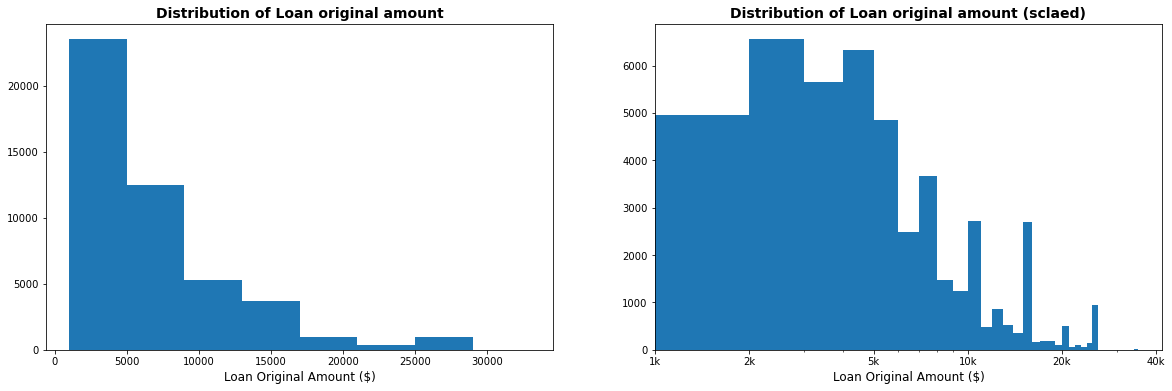

In [36]:
# start with a standard-scaled plot
plt.figure(figsize=[20, 6])
plt.subplot(1,2,1)
binsize = 1000
bins = np.arange(1000, loan_datar['LoanOriginalAmount'].max()+binsize, 4000)
plt.hist(data = loan_datar, x = 'LoanOriginalAmount', bins = bins )
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.title('Distribution of Loan original amount', fontsize=14, fontweight='heavy')

# Scaling the x-axis
plt.subplot(1,2,2)
bins = np.arange(1000, loan_datar['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data = loan_datar, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1000, 2000, 5000, 10000, 20000, 40000 ],
           ['1k', '2k', '5k', '10k', '20k', '40k'])
plt.xlim(1000,)
plt.xlabel('Loan Original Amount ($)', fontsize=12)
plt.title('Distribution of Loan original amount (sclaed)', fontsize=14, fontweight='heavy');

**Observation**

From the histogram on the left, its hard to really interprete the distribution. From the histogram on the right, we can see that most of the applicants apply for loan withinh the range of **1K  to 5K (USD)**

#### Question 2 - What are the top 10 reason that loans were mostly applied for, on the `prosper platform` ?

To do this we are going to make two univariate plots
1. Plotting the Percentage(%) of loan applicatins by Listing Category
2. Plotting the Top 10 Listing Category with Loan Applications

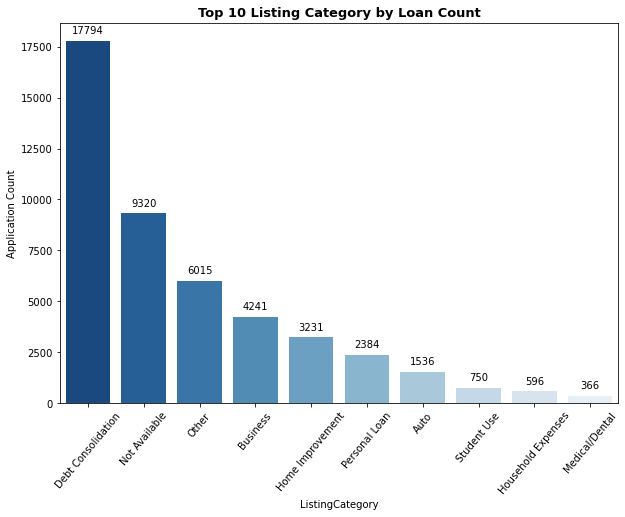

In [37]:
# Plotting the Top 10 Listing Category by Loan Counts
plt.figure(figsize=[10,7])
#plt.subplot(2,1,2)
ax = sb.countplot(data= loan_datar, x='ListingCategory', 
             order=loan_datar['ListingCategory'].value_counts().iloc[:10].index,
             palette = 'Blues_r',
            )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.xticks(rotation=50)
plt.ylabel('Application Count')
plt.title('Top 10 Listing Category by Loan Count',  fontsize=13,fontweight='heavy');

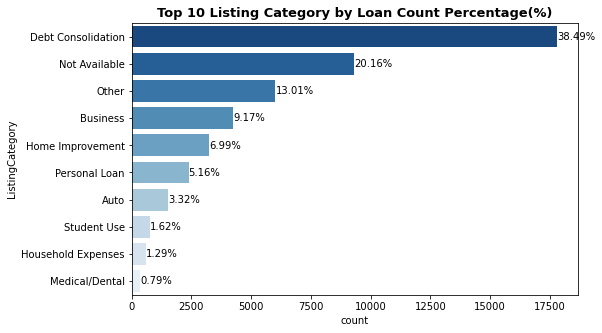

In [38]:
# Plotting the Percentage(%) of loan applicatins by Listing Category

# Selecting our base color for plotting
base_color = sb.color_palette()[9]

# Getting the count of the categories in ListingCategory Column
list_count = loan_datar['ListingCategory'].value_counts().iloc[:10]

plt.figure(figsize=[8,5])
# Making the plot
#plt.subplot(2,1,1)
sb.countplot(data= loan_datar, y='ListingCategory', 
             order=list_count.iloc[:10].index,
             palette='Blues_r')
# Adding anotations to the plot
for i in range (list_count.shape[0]):
    # Remember, list_count contains the frequency of unique values in the `ListingCategory` column in decreasing order.
    count = list_count[i]
    # Convert count into string
    ct_string = '{:0.2f}'.format(100*(count/list_count.sum()))
    # Print the string value on the bar. 
    plt.text(count+1, i, (ct_string+'%'), va='center')
plt.title('Top 10 Listing Category by Loan Count Percentage(%)',  fontsize=13,fontweight='heavy');

You can read more about the arguments of text() function used in the first plot [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

**Observation**: 

From the plots above we can see that most loans are those taken for debt consolidation.  

`Debt consolidation refers to the act of taking out a new loan to pay off other liabilities and consumer debts`

However, we can observe that the Listing Category with the second hightest count of loan is `Not Available` category. 

What this means is that; a large number of applicants couldn't find the category which defines thier purpose of application. The `Prosper`platform can provide option for new applicants to enter the reason for thier application.

For the first plot, we had to perform calculation `(100*(count/list_count.sum()))` to get the percent of application count in each listing category


#### Question 3 - Under which employment category, did we have the most applicants and what is the percentage ?

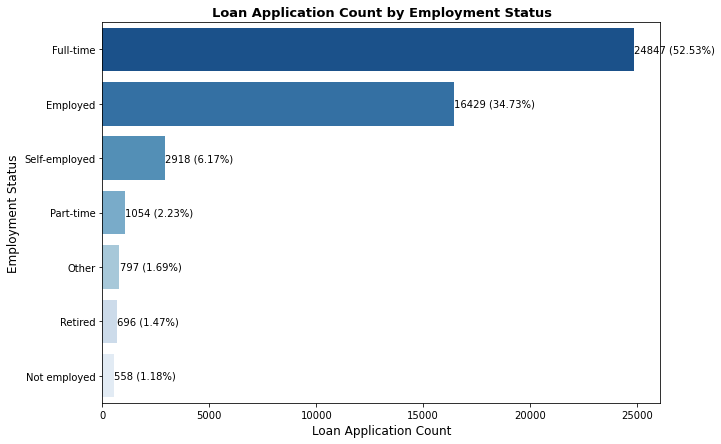

In [39]:
list_count = loan_datar.EmploymentStatus.value_counts()

plt.figure(figsize=[10,7])
sb.countplot(data= loan_datar, y='EmploymentStatus', 
             order=list_count.index,
             palette='Blues_r')
for i in range (list_count.shape[0]):
    count = list_count[i]
    ct_string = '{:0.0f}'.format(count)
    pct = (100*(count/list_count.sum()))
    pct_string = '{:0.2f}'.format(pct)
    plt.text(count+1, i, (ct_string)+' ('+pct_string+'%)', va = 'center')
plt.title('Loan Application Count by Employment Status', fontweight='bold', fontsize=13)
plt.xlabel('Loan Application Count', fontsize=12)
plt.ylabel('Employment Status', fontsize=12);

**Observation**: 

From the plot above we can see that most loans are taken by full-time employees, with retirees taking the least count of applications.

In [40]:
"""
cr_count = locay.groupby(['CreditScoreRange'], as_index=False)['LoanOriginalAmount'].sum()
cr_count['Percentage'] = round(((cr_count['LoanOriginalAmount'] / cr_count['LoanOriginalAmount'].sum())*100), 2)
cr_count['%'] = cr_count['Percentage'].astype(str) + '%'
cr_count

# Making the plot
plt.figure(figsize=[12,8])
cr_count = locay['CreditScoreRange'].value_counts()
ax=sb.countplot(data= locay, y='CreditScoreRange', color=sb.color_palette()[0])
plt.xlabel('Loan Count', fontsize=12)
plt.ylabel('Credit Score Range', fontsize=12)
plt.title('Loan Count By Credit Score Range', fontweight='bold', fontsize=13);

for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center");            
"""

'\ncr_count = locay.groupby([\'CreditScoreRange\'], as_index=False)[\'LoanOriginalAmount\'].sum()\ncr_count[\'Percentage\'] = round(((cr_count[\'LoanOriginalAmount\'] / cr_count[\'LoanOriginalAmount\'].sum())*100), 2)\ncr_count[\'%\'] = cr_count[\'Percentage\'].astype(str) + \'%\'\ncr_count\n\n# Making the plot\nplt.figure(figsize=[12,8])\ncr_count = locay[\'CreditScoreRange\'].value_counts()\nax=sb.countplot(data= locay, y=\'CreditScoreRange\', color=sb.color_palette()[0])\nplt.xlabel(\'Loan Count\', fontsize=12)\nplt.ylabel(\'Credit Score Range\', fontsize=12)\nplt.title(\'Loan Count By Credit Score Range\', fontweight=\'bold\', fontsize=13);\n\nfor p in ax.patches:\n    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),\n            xytext=(5, 0), textcoords=\'offset points\', ha="left", va="center");            \n'

## Bivariate Exploration

#### Question 4 - What relationship exists betweeen stated monthly income and loan original amount ?

In [41]:
loan_datar['StatedMonthlyIncome'].describe()

count     47299.000000
mean       5105.294552
std        5773.216900
min           0.000000
25%        2883.000000
50%        4250.000000
75%        6250.000000
max      618547.000000
Name: StatedMonthlyIncome, dtype: float64

In [42]:
loan_datar[loan_datar['StatedMonthlyIncome'] == 0]

,LoanNumber,ListingCreationDate,ListingCategory,LoanStatus,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,...,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Term,MonthlyLoanPayment,InvestmentFromFriendsCount,Recommendations,Investors,CreditScoreRange
78,33852,2008-06-29,Business,Chargedoff,0.18,Full-time,68,Home-Owner,720.0,739.0,...,Not-Verifiable,0,4800,2008-07-08,36,171.13,0,0,115,720 - 739
100,82947,2013-01-25,Household Expenses,Chargedoff,0.35,Not employed,12,Not-Home-Owner,720.0,739.0,...,Not-Verifiable,0,4000,2013-01-30,36,172.76,0,0,73,720 - 739
108,30830,2008-04-29,Debt Consolidation,Completed,0.28,Full-time,27,Not-Home-Owner,640.0,659.0,...,Not-Verifiable,0,14000,2008-05-09,36,564.07,0,0,53,640 - 659
170,63781,2012-04-14,Other,Completed,0.29,Not employed,9,Home-Owner,760.0,779.0,...,Not-Verifiable,0,10000,2012-04-17,36,397.55,0,0,161,760 - 779
186,60674,2012-02-03,Home Improvement,Chargedoff,0.36,Not employed,7,Not-Home-Owner,660.0,679.0,...,Not-Verifiable,0,4000,2012-02-16,36,173.71,0,0,45,660 - 679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113622,59914,2012-01-13,Other,Chargedoff,0.35,Not employed,10,Not-Home-Owner,640.0,659.0,...,Not-Verifiable,0,4000,2012-02-03,36,171.08,0,0,45,640 - 659
113682,58938,2012-01-11,Debt Consolidation,Chargedoff,0.33,Not employed,87,Home-Owner,760.0,779.0,...,Not-Verifiable,0,10000,2012-01-17,60,323.35,0,0,1,760 - 779
113686,23589,2007-12-04,Not Available,Completed,0.22,Full-time,26,Not-Home-Owner,740.0,759.0,...,Not-Verifiable,0,14900,2007-12-13,36,560.21,1,0,260,740 - 759
113767,27091,2008-01-22,Business,Chargedoff,0.37,Self-employed,22,Not-Home-Owner,520.0,539.0,...,Not-Verifiable,0,5000,2008-02-04,36,224.77,1,1,5,520 - 539


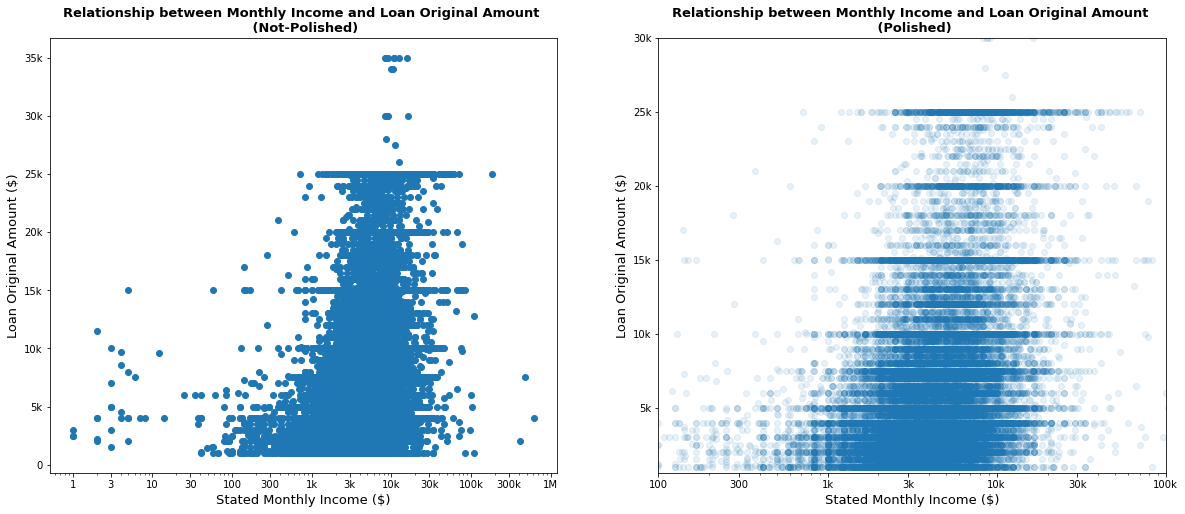

In [43]:
plt.figure(figsize=[20,8])

# Plotting Standard Scaled Scatterplot
plt.subplot(1,2,1)
plt.scatter(data=loan_datar, x='StatedMonthlyIncome', y='LoanOriginalAmount')
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000], 
           ['1', '3', '10', '30','100', '300', '1k', '3k', '10k', '30k', '100k', '300k', '1M'])
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
           ['0', '5k', '10k', '15k','20k', '25k', '30k', '35k'])
plt.xlabel('Stated Monthly Income ($)', fontsize=13)
plt.ylabel('Loan Original Amount ($)', fontsize=13)
plt.title('Relationship between Monthly Income and Loan Original Amount \n (Not-Polished)', fontweight='bold', fontsize=13);

# Plotting Scaled and Bounded Scatterplot
plt.subplot(1,2,2)
plt.scatter(data=loan_datar, x='StatedMonthlyIncome', y='LoanOriginalAmount', alpha=0.1)
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000], 
           ['1', '3', '10', '30','100', '300', '1k', '3k', '10k', '30k', '100k', '300k', '1M'])
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000], 
           ['0', '5k', '10k', '15k','20k', '25k', '30k', '35k'])
plt.xlim(100, 100000)
plt.ylim(600,30000);
plt.xlabel('Stated Monthly Income ($)', fontsize=13)
plt.ylabel('Loan Original Amount ($)', fontsize=13)
plt.title('Relationship between Monthly Income and Loan Original Amount \n (Polished)', fontweight='bold', fontsize=13);

**Observation**: 

**Note:** For the first plot, the upper and lower bounds are unadjusted on both axis, while for the second plot the bounds for x and y axis are ($100, $100k) and ($600,$30k) respectively

Naturally thinking, one would assume that the higher the monthly income of a person, the loan they can afford to take would be higher. 

However, our plot do make us realize that 
1. **The monthly income of a person does not directly impact the amount of loan they apply for on the prosper platform.**

This raises another question: **What stronlgy determines the loan aamount applied for by applicants on the prosper platform?**

2. There are few applications for amounts greater than $25K.


3. There are few applicants that have montlhy income as values less than $30. 

While we may be tempted to exclude these from our investigation, we need recall that there are unemployed persons within our datasat and majority of them have `Stated Monthly Income` as `$0` hence our inclussion. 



#### Question 5 - What relationship exists betweeen number of friends that invested in a loan and number of investors ?

On the prosper platform, when applicants apply for a loan, their friedns can invest parlty in the loans as well as others outside their circle up till the amount applied for is realised. Those who invest in the loans outside their cirlce are referred to as investors.

We aim to find ot if the number of friends that invest in the loan persuades more people to invets in the loan.

In [44]:
# getting descriptive statistics of our specified column
loan_datar['InvestmentFromFriendsCount'].describe()

count    47299.000000
mean         0.053299
std          0.352367
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: InvestmentFromFriendsCount, dtype: float64

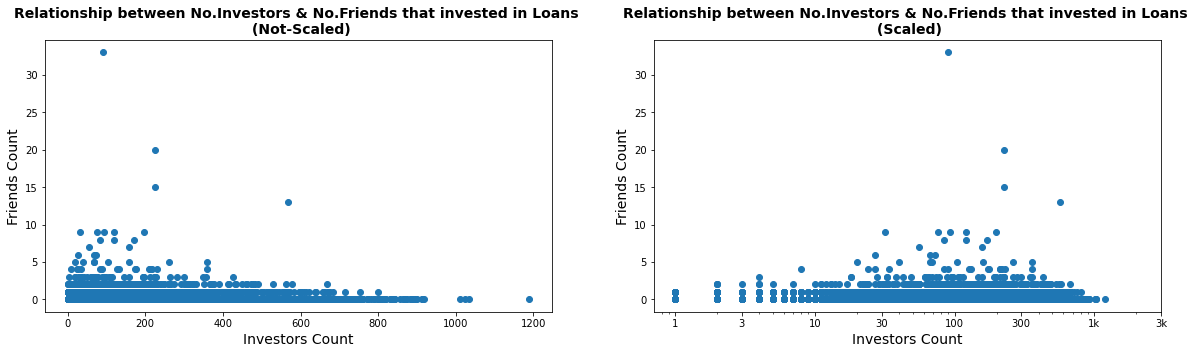

In [45]:
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.scatter(data=loan_datar, x='Investors', y='InvestmentFromFriendsCount')
plt.xlabel('Investors Count', fontsize=14)
plt.ylabel('Friends Count', fontsize=14)
plt.title("Relationship between No.Investors & No.Friends that invested in Loans \n (Not-Scaled)", fontweight='bold', fontsize=14);

plt.subplot(1,2,2)
plt.scatter(data=loan_datar, x='Investors', y='InvestmentFromFriendsCount')
plt.xscale('log')
plt.xticks([1, 3, 10, 30, 100, 300, 1000, 3000],[1, 3, 10, 30, 100, 300, '1k', '3k'])
plt.xlabel('Investors Count', fontsize=14)
plt.ylabel('Friends Count', fontsize=14)
plt.title("Relationship between No.Investors & No.Friends that invested in Loans \n (Scaled)",
          fontweight='bold', fontsize=14);

**Observation**: 

Again Naturally thinking, one would assume that the investors should be persuaded if more of one's friends invest in a loan. 

However, our plot do make us realize that 
1. The number of investors who invest in a loan is not influnced by the number of applicant's friends who invest in a loan.

From the plot above we can see that the loan with the highest number of investors (1,000+) has less than 5 friends who invested in it.

This leaves us with a question: **What strongly determines the number of investors who invest in a loan?** With this information an applicant will be able to increase thier chances of securing their loans.


#### Question 6 - What category of applicants has more tendency to complete a laon replayment?

In [46]:
loan_datar['LoanStatus'].value_counts()

Completed     33424
Chargedoff    10594
Defaulted      3280
Cancelled         1
Name: LoanStatus, dtype: int64

In [47]:
loan_datar['IncomeVerifiable'].value_counts()

Verifiable        43127
Not-Verifiable     4172
Name: IncomeVerifiable, dtype: int64

In [48]:
# excluding observation with canceled LoanSatatus as we have only 1 observation with canceled status
locav = loan_datar[loan_datar['LoanStatus'] != 'Cancelled']

# Grouping our variabbles for plotting
locav = locav.groupby(['IncomeVerifiable', 'LoanStatus'], as_index=False)['LoanNumber'].count()
locav.rename(columns = {'LoanNumber':'Total'}, inplace = True)
locav.reset_index(inplace=True)
locav = locav.drop('index', axis=1)

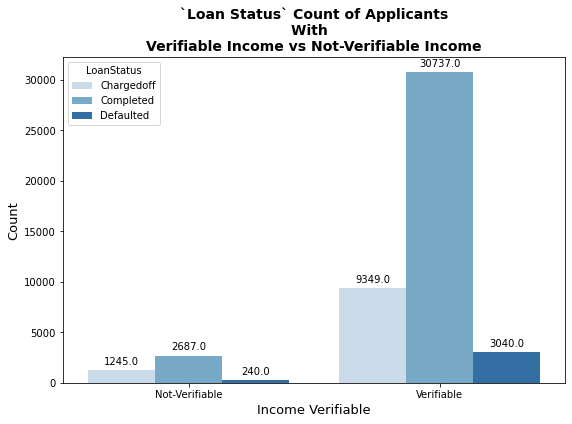

In [49]:
# Plotting a clustered barchart
plt.figure(figsize=[9,6])
splot = sb.barplot(data = locav, x='IncomeVerifiable', y='Total', hue='LoanStatus', palette='Blues');

# Adding annotation 
for p in splot.patches:
    splot.annotate(format(p.get_height()),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.title('`Loan Status` Count of Applicants\nWith  \nVerifiable Income vs Not-Verifiable Income', fontweight='bold', fontsize=14)
plt.ylabel('Count', fontsize=13);
plt.xlabel('Income Verifiable', fontsize=13);

**Observation**: 

From our plots we can see that 
1. Applicants with verifiable income has more counts in terms of **clompleted** loan repayments.

2. Applicants with Income Not-Verifiable has relavely larger number of **charged off** loans.

This means that investors were more willing to invest in loans whose borrower's income were verifiable

## Multivariate Exploration

From our bivariate analysis we encountered two questions

1. What stronlgy determines the loan amount applied for by applicants on the prosper platform?
2. What strongly determines the number of investors who invest in a loan? 

We will adress these two questions, then explore other relationships among variables  

#### Question 7: What stronlgy determines the loan amount applied for by applicants on the prosper platform?

To do this we are going to make a plot matrix of variables ('LoanOriginalAmount', 'StatedMonthlyIncome' and 'BorrowerAPR') using seaborn's PairGrid Function. This is done to explore the relationship that may exists betweeen these variables

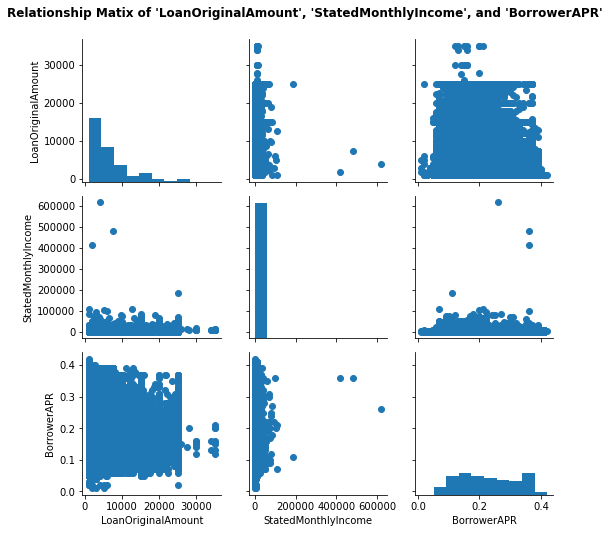

In [50]:
# Excluding 'cancelled' loans in listing category from our visualisation
locay = loan_datar[loan_datar['LoanStatus'] != 'Cancelled']

# Making the Plot Matrix
g = sb.PairGrid(data = locay, vars = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);
plt.title('')

# Adding Title
g.fig.subplots_adjust(top=0.92) # adjust the Figure in g
g.fig.suptitle("Relationship Matix of 'LoanOriginalAmount', 'StatedMonthlyIncome', and 'BorrowerAPR'", 
               fontweight='bold');

**Observation:** We can see that ther exist no relationship amongst the variables
    
This exploration makes it obvious that while there may be an explanatory variable to determine the Loan Amount applied for, it exist outside the scope of our analysis. 

However from **chart** titled; **`Top 10 Listing Category by Loan Count`**, we can say Debt Consolidation is the reason for which almost half of the total applicants seek loan on the prosper platform. 

#### Question 8: What strongly determines the number of investors who invest in a loan?

To do this we are going to find the correlation amongst the numerical variables in the dataset and render the correlation matrix on a HeatMap

In [51]:
loan_datar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47299 entries, 0 to 113935
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   LoanNumber                  47299 non-null  int64         
 1   ListingCreationDate         47299 non-null  datetime64[ns]
 2   ListingCategory             47299 non-null  category      
 3   LoanStatus                  47299 non-null  object        
 4   BorrowerAPR                 47299 non-null  float64       
 5   EmploymentStatus            47299 non-null  object        
 6   EmploymentStatusDuration    47299 non-null  int32         
 7   IsBorrowerHomeowner         47299 non-null  object        
 8   CreditScoreRangeLower       47299 non-null  float64       
 9   CreditScoreRangeUpper       47299 non-null  float64       
 10  IncomeRange                 47299 non-null  object        
 11  IncomeVerifiable            47299 non-null  object   

In [52]:
loan_datar.head(1)

,LoanNumber,ListingCreationDate,ListingCategory,LoanStatus,BorrowerAPR,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,...,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,Term,MonthlyLoanPayment,InvestmentFromFriendsCount,Recommendations,Investors,CreditScoreRange
0,19141,2007-08-26,Not Available,Completed,0.17,Self-employed,2,Home-Owner,640.0,659.0,...,Verifiable,3083,9425,2007-09-12,36,330.43,0,0,258,640 - 659


In [53]:
# Creating a dataframe containing Numerical variables
numerical_cols = [ 'Investors','BorrowerAPR','InvestmentFromFriendsCount', 'Recommendations','StatedMonthlyIncome', 'LoanOriginalAmount','Term','EmploymentStatusDuration']
loan_d = loan_datar[numerical_cols]
loan_d.head(1)

,Investors,BorrowerAPR,InvestmentFromFriendsCount,Recommendations,StatedMonthlyIncome,LoanOriginalAmount,Term,EmploymentStatusDuration
0,258,0.17,0,0,3083,9425,36,2


In [54]:
# Creating a table showing the correlation  significance amongst variables
cor_table = loan_d.corr()
cor_table

,Investors,BorrowerAPR,InvestmentFromFriendsCount,Recommendations,StatedMonthlyIncome,LoanOriginalAmount,Term,EmploymentStatusDuration
Investors,1.000000,-0.409357,0.039572,0.050221,0.137395,0.674122,0.015514,-0.010264
BorrowerAPR,-0.409357,1.000000,-0.074808,-0.076476,-0.068130,-0.231263,0.063065,0.049300
InvestmentFromFriendsCount,0.039572,-0.074808,1.000000,0.732535,-0.014680,0.036633,-0.022200,-0.025082
Recommendations,0.050221,-0.076476,0.732535,1.000000,-0.023059,0.035964,-0.031610,-0.032622
StatedMonthlyIncome,0.137395,-0.068130,-0.014680,-0.023059,1.000000,0.192504,-0.006827,0.109081
LoanOriginalAmount,0.674122,-0.231263,0.036633,0.035964,0.192504,1.000000,0.232882,0.055268
Term,0.015514,0.063065,-0.022200,-0.031610,-0.006827,0.232882,1.000000,0.052809
EmploymentStatusDuration,-0.010264,0.049300,-0.025082,-0.032622,0.109081,0.055268,0.052809,1.000000


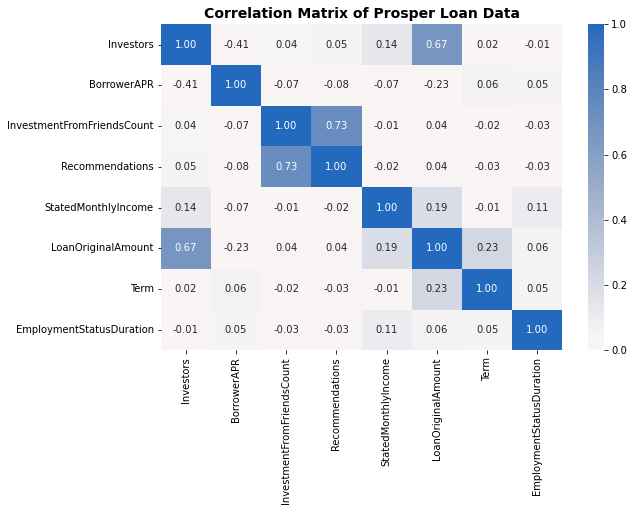

In [55]:
plt.figure(figsize=[9,6])
sb.heatmap(loan_d.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', vmin=0 , center = 0)
plt.title('Correlation Matrix of Prosper Loan Data', fontweight='heavy', fontsize=14);

**Observation:** 

From the correlation matrix.

**1. The the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants. We can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. However, the stated monthly income of an applicanthas a degree of impresion on investors.**

**2.** We can also observe strong corralation between the number of friends who invest in a loan and the number of recomendations. This simply means that friends who invest in a loan are most likely to make a recomendation.

#### Question 9: What significant relationship does the `loan original amount and monthly repayment` has with the `loan term and Home-Owner Status` on the prosper platform?

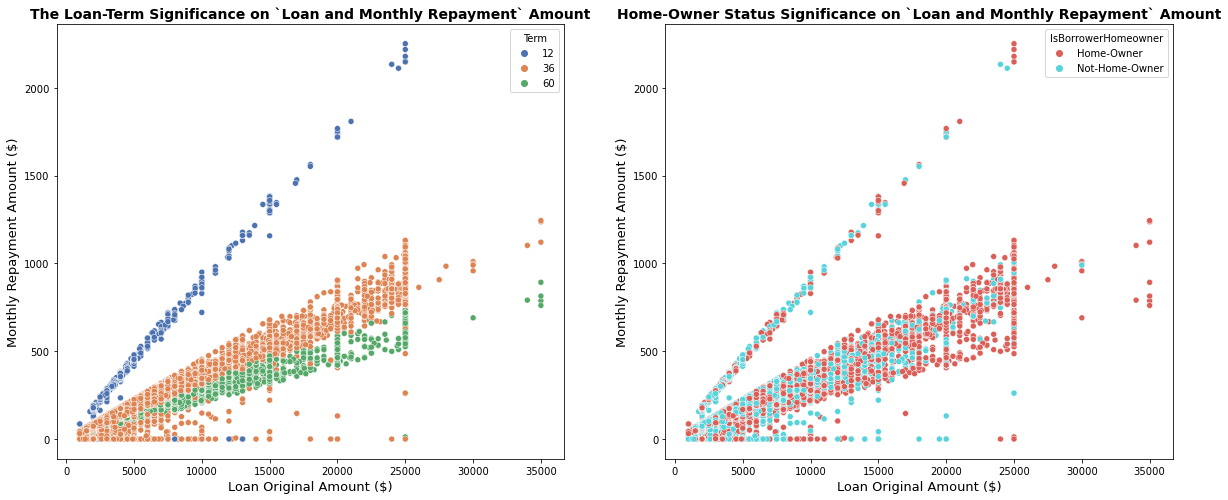

In [56]:
plt.figure(figsize=[20,8])

plt.subplot(1,2,1)
sb.scatterplot(data=loan_datar, x='LoanOriginalAmount', y='MonthlyLoanPayment', 
               hue='Term', palette="deep");
plt.title('The Loan-Term Significance on `Loan and Monthly Repayment` Amount', fontweight='bold', fontsize=14)
plt.xlabel('Loan Original Amount ($)', fontsize=13)
plt.ylabel('Monthly Repayment Amount ($)', fontsize=13)

plt.subplot(1,2,2)
sb.scatterplot(data=loan_datar, x='LoanOriginalAmount', y='MonthlyLoanPayment', 
               hue='IsBorrowerHomeowner', palette="hls")
plt.title('Home-Owner Status Significance on `Loan and Monthly Repayment` Amount', fontweight='bold', fontsize=14);
plt.xlabel('Loan Original Amount ($)', fontsize=13)
plt.ylabel('Monthly Repayment Amount ($)', fontsize=13);

**Observation:** 

From the plot on the left we observe that 
* The shorther the loan term, the higher the monthly repayment amount.

From the plot on the right we can observe that 
* Home-Owners are more likely to apply for loans with term above twelve(12) months.
* The loan with the highest amount was taken by a Home Owner.

#### Question 10: Which employment category has the higest number of completed, defaulted and chargedoff loans?

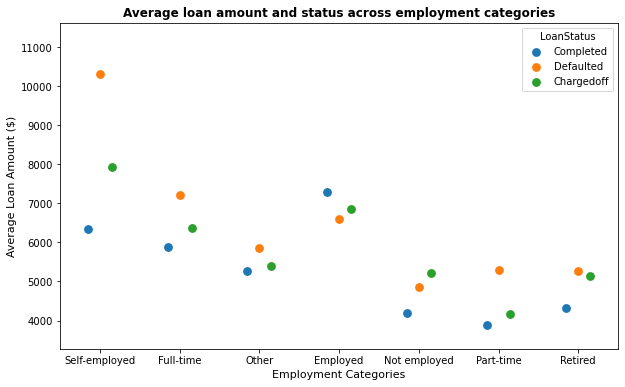

In [57]:
# Plotting a point plot
plt.figure(figsize=[10,6])
ax = sb.pointplot(data = locay , x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'LoanStatus', 
                  dodge = 0.3, errwidth=False, linestyles = "")
#plt.xticks(rotation=25);
plt.xlabel('Employment Categories', fontsize=11)
plt.ylabel('Average Loan Amount ($)', fontsize=11)
plt.title('Average loan amount and status across employment categories' ,fontweight='bold', fontsize=12);

**Observaton:**

From the plot above we can see that 
1. We have more completed loans from borrowers under the 'Employed' category.
2. Borrowers that are Not Employed have the most charged of loans.
3. For all other categories except 'employed and not-employed', have more loans that are defaulted.

## Conclusions

 1. Most of the borrowers apply for loan withinh the range of **1K  to 5K (USD)**
 2. Borrowers that are not employed have the most charged of loans.
 3. Applicants with verifiable income has more counts in terms of **clompleted** loan repayments.
 4. The shorther the loan term, the higher the monthly repayment amount.
 5. The the number of investors for a loan is mostly determined by the Loan Original Amount, then by the stated monthly income of the applicants. We can say that the larger a loan amount is, the higher the number of investors who would invest in the loan. However, the stated monthly income of an applicant has a degree of impresion on investors.